#Wine Quality Prediction

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine_data = pd.read_csv("https://raw.githubusercontent.com/sandespalakat/Datascience/main/Wine-Quality/Data/wine-quality-red.csv")

In [3]:
red_wine = pd.DataFrame(wine_data)

In [4]:
red_wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [5]:
red_wine["goodquality"] = np.where(red_wine["quality"] >= 7,1,0)

In [6]:
red_wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  goodquality  
0         9.4        5            0  
1         9.8        5            0  
2         9.8        5            0  
3         9.8        6            0  
4         9.4        5            0  
...       ...      ...          ...  
1594     10.5        5            0  
1595     11.2        6            0  
1596     11.0        6            0  
1597     10.2        5            0  
1598     11.0        6            0  

[1599 rows x 13 columns]

In [7]:
pd.set_option('display.max_rows', None)

In [8]:
red_wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
13              7.8             0.610         0.29            1.60      0.114   
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
16              8.5             0.280         0.56            1.80      0.092   
17              8.1             0.560         0.28            1.70      0.368   
18              7.4             0.590         0.08            4.40      0.086   
19              7.9             0.320         0.51            1.80      0.341   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
30              6.7             0.675         0.07            2.40      0.089   
31              6.9             0.685         0.00            2.50      0.105   
32              8.3             0.655         0.12            2.30      0.083   
33              6.9             0.605         0.12           10.70      0.073   
34              5.2             0.320         0.25            1.80      0.103   
35              7.8             0.645         0.00            5.50      0.086   
36              7.8             0.600         0.14            2.40      0.086   
37              8.1             0.380         0.28            2.10      0.066   
38              5.7             1.130         0.09            1.50      0.172   
39              7.3             0.450         0.36            5.90      0.074   
40              7.3             0.450         0.36            5.90      0.074   
41              8.8             0.610         0.30            2.80      0.088   
42              7.5             0.490         0.20            2.60      0.332   
43              8.1             0.660         0.22            2.20      0.069   
44              6.8             0.670         0.02            1.80      0.050   
45              4.6             0.520         0.15            2.10      0.054   
46              7.7             0.935         0.43            2.20      0.114   
47              8.7             0.290         0.52            1.60      0.113   
48              6.4             0.400

(array([1382.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         217.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

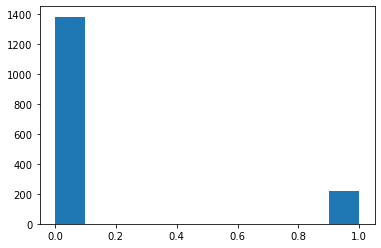

In [9]:
plt.hist(red_wine["goodquality"])

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

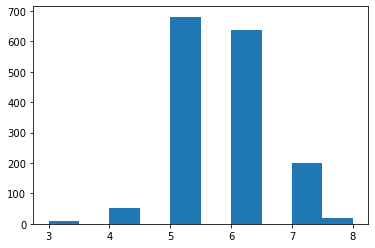

In [10]:
plt.hist(red_wine["quality"])

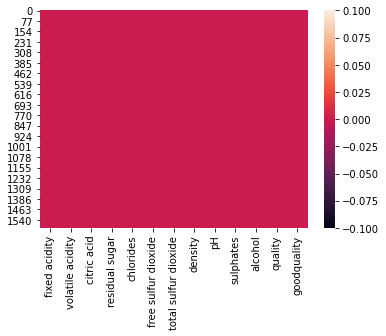

In [11]:
sns.heatmap(red_wine.isnull())

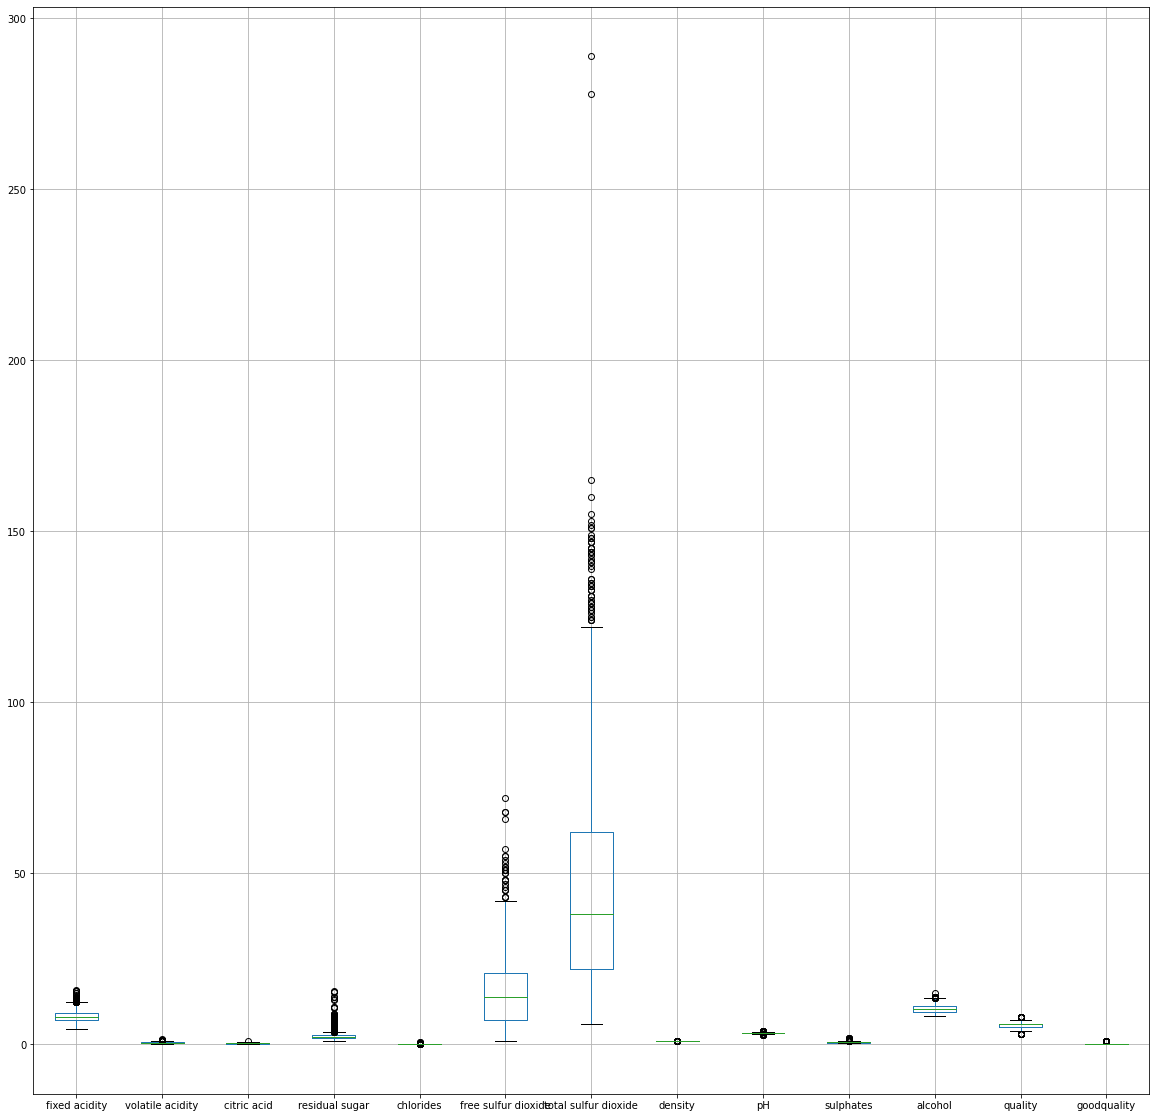

In [12]:
red_wine.boxplot(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F37A187E20>,
      dtype=object)

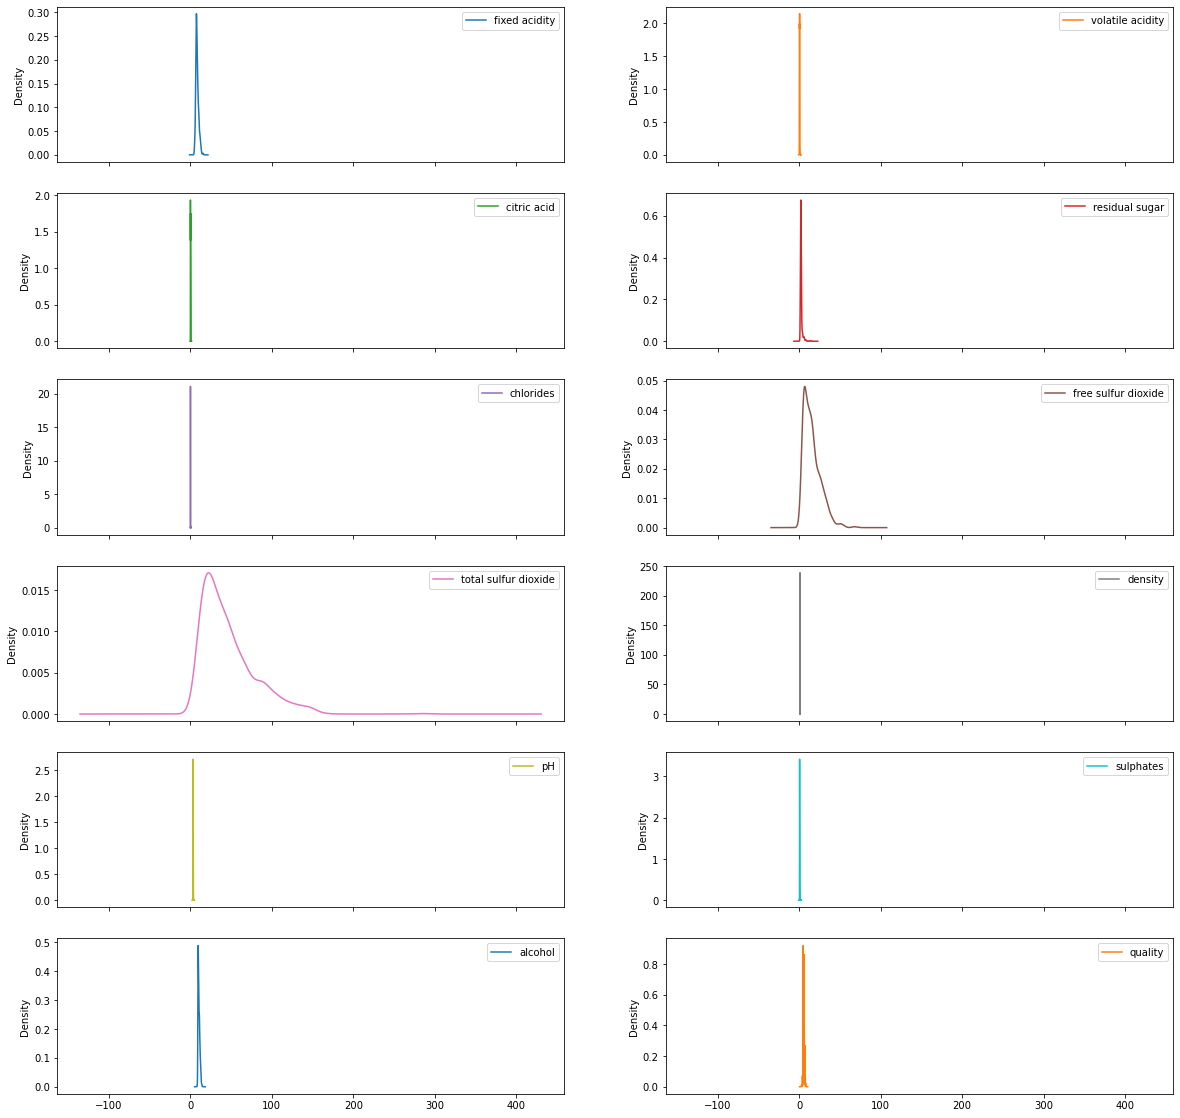

In [13]:
red_wine.iloc[:,:-1].plot(kind="density", subplots=True, figsize=(20, 20), layout=(6,2))

<Figure size 2160x2160 with 0 Axes>

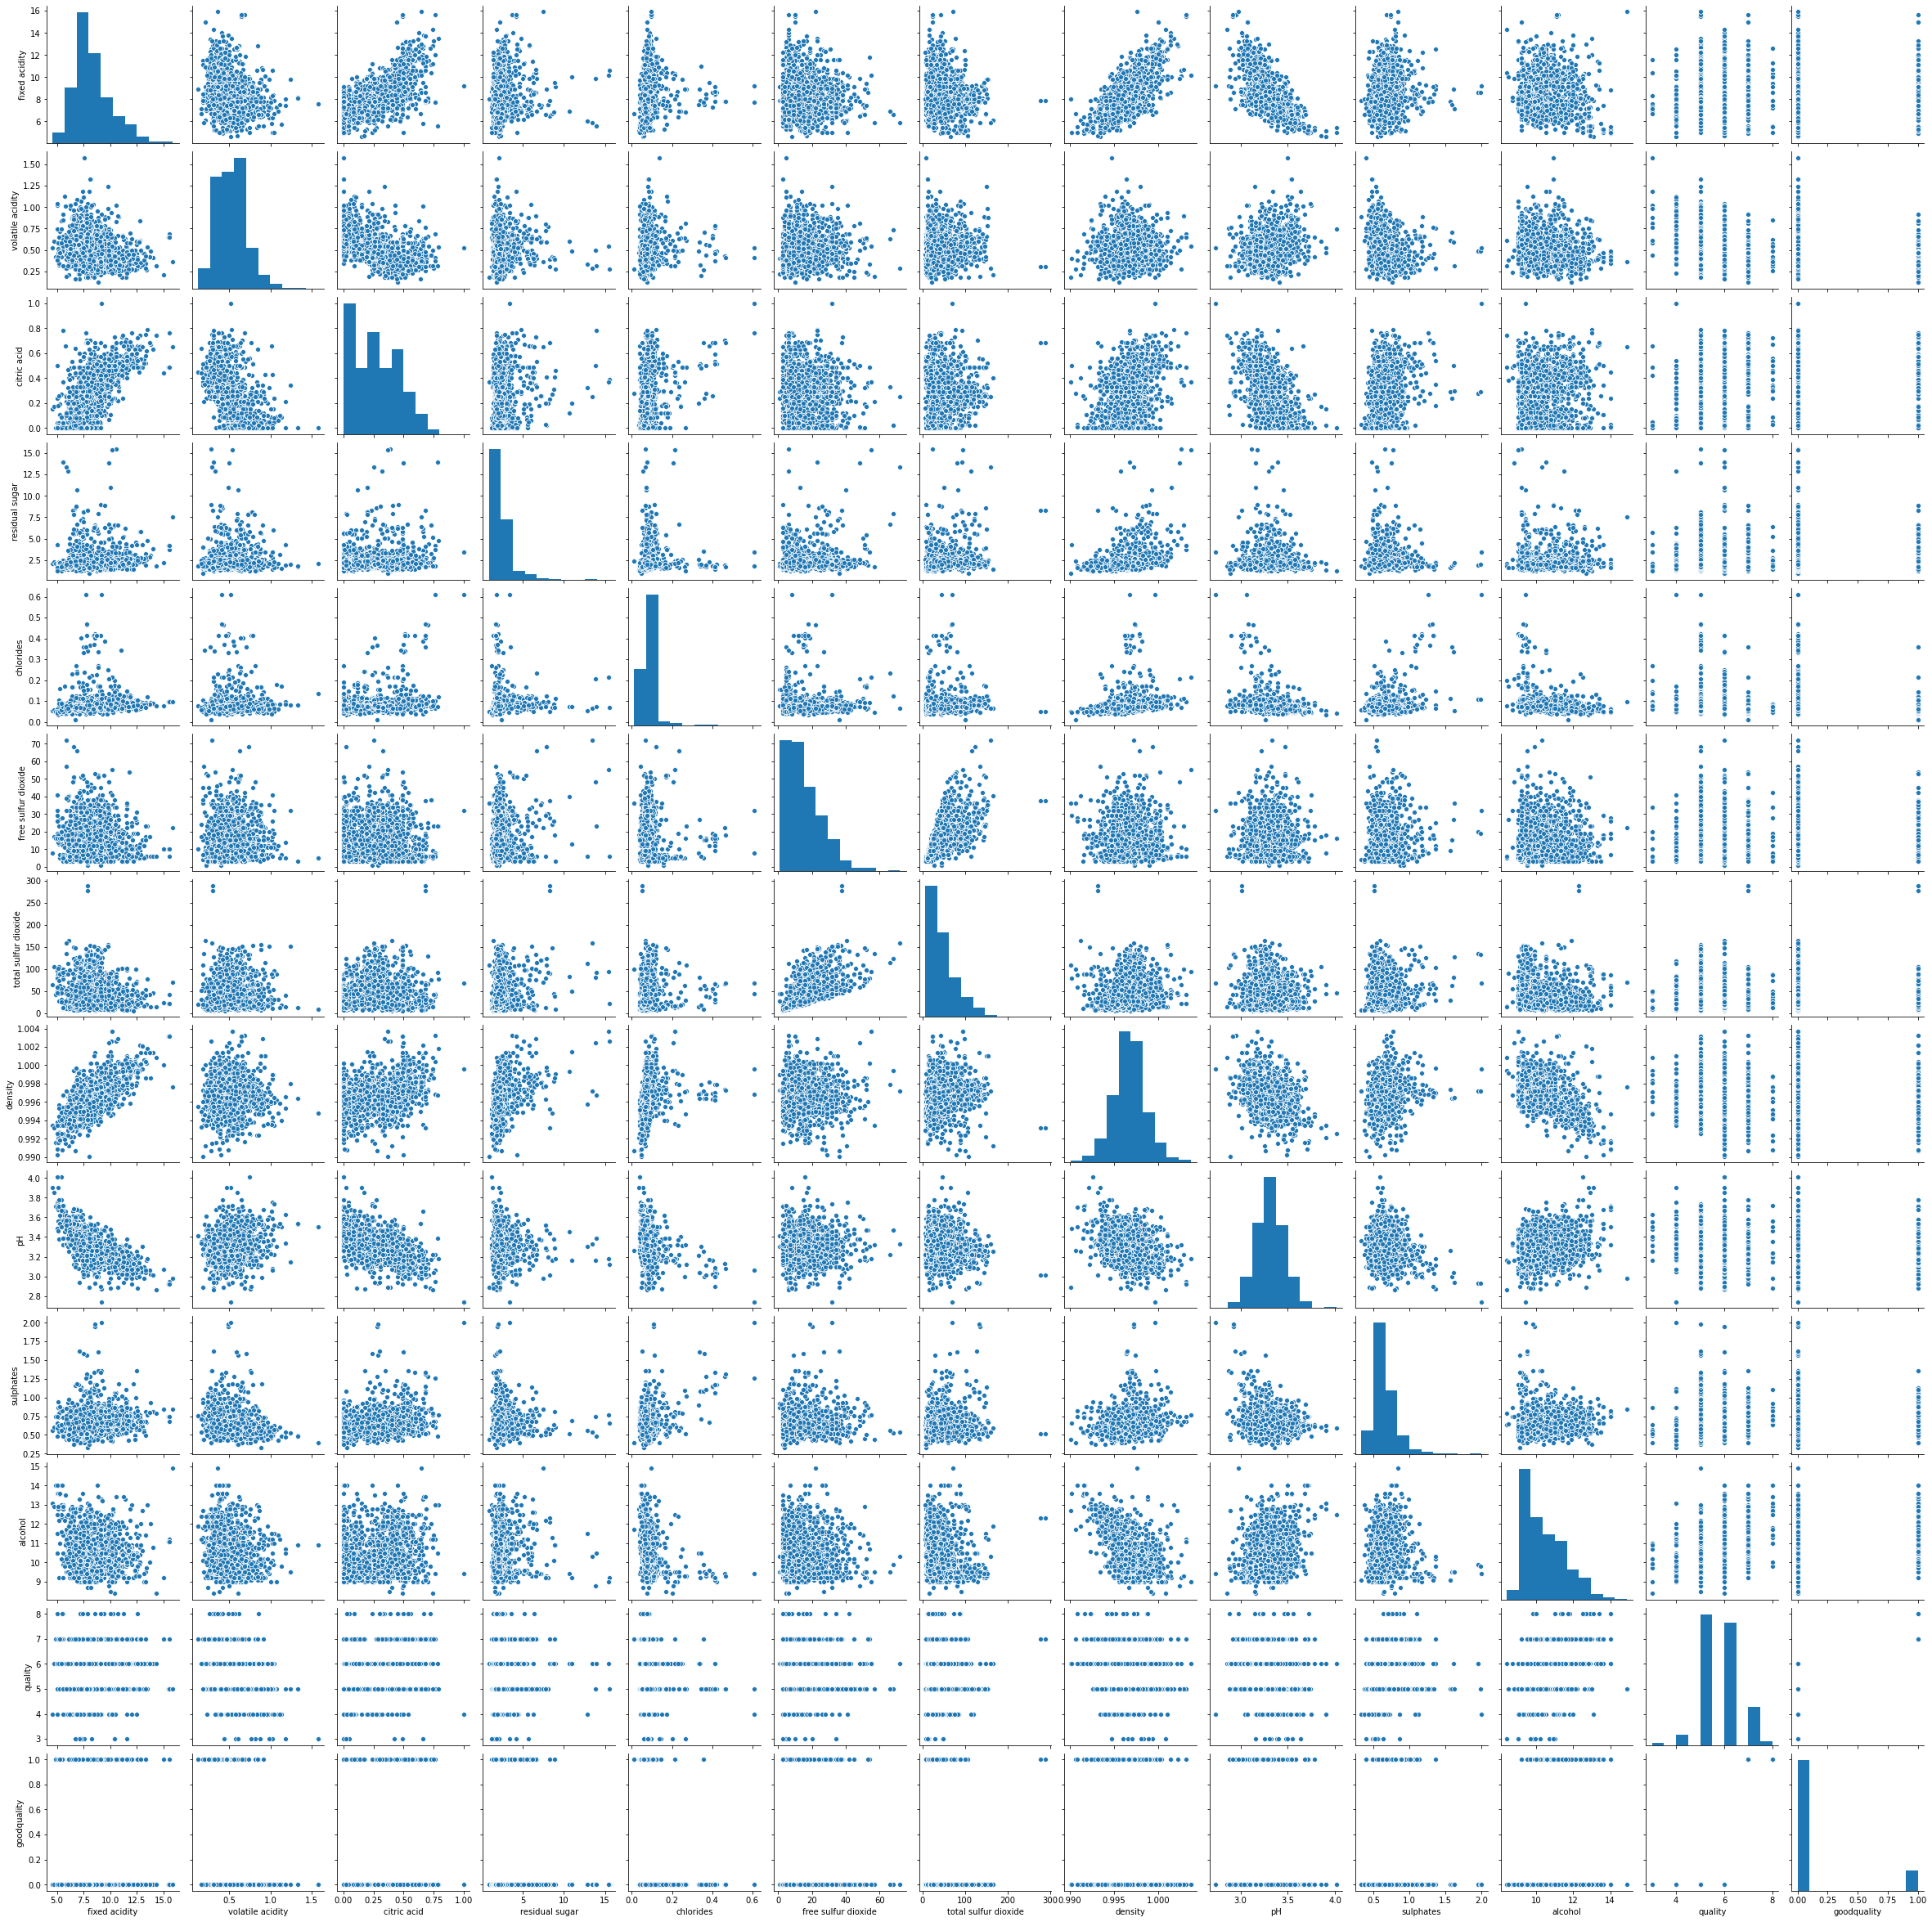

In [14]:
plt.figure(figsize=(30,30))
sns.pairplot(red_wine)

In [15]:
wine_cor = red_wine.corr()

In [16]:
wine_cor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   
goodquality                0.120061         -0.270712     0.214716   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   
goodquality                 0.047779  -0.097308            -0.071747   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   
goodquality                      -0.139517 -0.150460 -0.057283   0.199485   

                       alcohol   quality  goodquality  
fixed acidity        -0.061668  0.124052     0.120061  
volatile acidity     -0.202288 -0.390558    -0.270712  
citric acid           0.109903  0.226373     0.214716  
residual sugar        0.042075  0.013732     0.047779  
chlorides            -0.221141 -0.128907    -0.097308  
free sulfur dioxide  -0.069408 -0.050656    -0.071747  
total sulfur dioxide -0.205654 -0.185100    -0.139517  
density              -0.496180 -0.174919    -0.150460  
pH                    0.205633 -0.057731    -0.057283  
sulphates             0.093595  0.251397     0.199485  
alcohol               1.000000  0.476166     0.407315  
quality               0.476166  1.000000     0.710196  
goodquality           0.407315  0.710196     1.000000

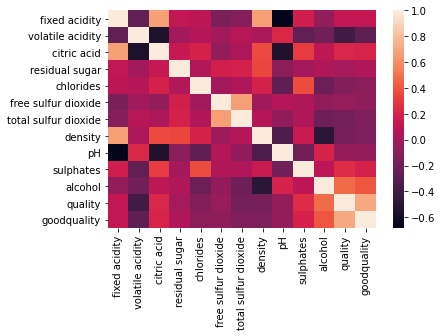

In [17]:
sns.heatmap(wine_cor)

In [18]:
red_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  goodquality  
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023     0.135710  
std       0.154386     0.169507     1.065668     0.807569     0.342587  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.210000     0.550000     9.500000     5.000000     0.000000  
50%       3.310000     0.620000    10.200000     6.000000     0.000000  
75%       3.400000     0.730000    11.100000     6.000000     0.000000  
max       4.010000     2.000000    14.900000     8.000000     1.000000

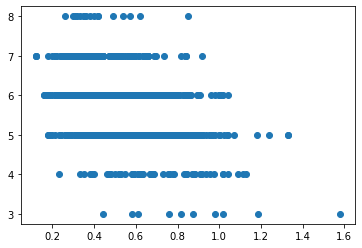

In [19]:
plt.scatter(red_wine["volatile acidity"], red_wine["quality"])

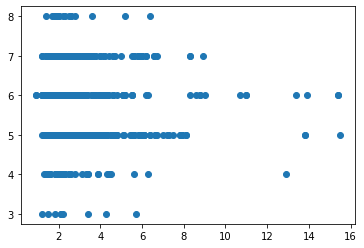

In [20]:
plt.scatter(red_wine["residual sugar"], red_wine["quality"])

Observations<br>
No null data is present<br>
Outliers present in almost eveery column<br>
Some columns like residual sugar,volatile acidity, free sulphar dioxide are approximately zero correlated with quality<br>
There is a skew in total sulphar dioxide

In [21]:
from scipy.stats import zscore

In [22]:
z_wine = np.abs(zscore(red_wine))

In [23]:
z_wine

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.96024611, 0.78782264,
        0.39625599],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.58477711, 0.78782264,
        0.39625599],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.58477711, 0.78782264,
        0.39625599],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54162988, 0.45084835,
        0.39625599],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.20930812, 0.78782264,
        0.39625599],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.54162988, 0.45084835,
        0.39625599]])

In [24]:
wine = red_wine[(z_wine<3).all(axis=1)]

In [25]:
wine = pd.DataFrame(wine)

In [26]:
red_wine.shape

(1599, 13)

In [27]:
wine.shape

(1451, 13)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F378F6A160>,
      dtype=object)

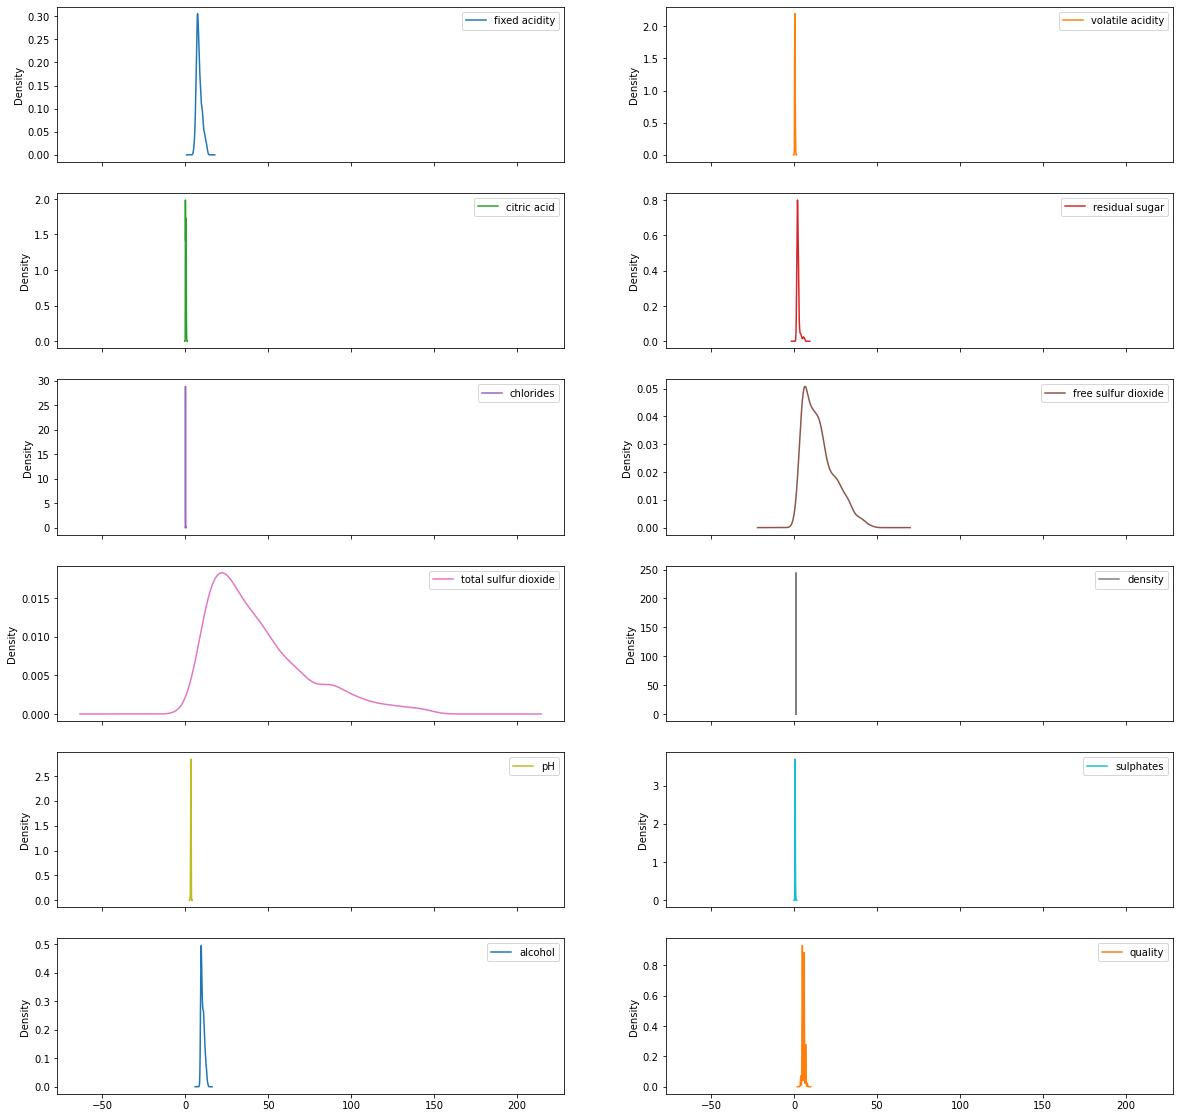

In [28]:
wine.iloc[:,:-1].plot(kind="density", subplots=True, figsize=(20, 20), layout=(6,2))

In [29]:
from scipy.stats import boxcox

In [30]:
wine["total sulfur dioxide"] = boxcox(wine["total sulfur dioxide"], 0)

In [31]:
wine["free sulfur dioxide"] = boxcox(wine["free sulfur dioxide"], 0)

In [32]:
wine["alcohol"] = boxcox(wine["alcohol"], 0)

In [33]:
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
16              8.5             0.280         0.56            1.80      0.092   
18              7.4             0.590         0.08            4.40      0.086   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
30              6.7             0.675         0.07            2.40      0.089   
31              6.9             0.685         0.00            2.50      0.105   
32              8.3             0.655         0.12            2.30      0.083   
34              5.2             0.320         0.25            1.80      0.103   
35              7.8             0.645         0.00            5.50      0.086   
36              7.8             0.600         0.14            2.40      0.086   
37              8.1             0.380         0.28            2.10      0.066   
39              7.3             0.450         0.36            5.90      0.074   
40              7.3             0.450         0.36            5.90      0.074   
41              8.8             0.610         0.30            2.80      0.088   
44              6.8             0.670         0.02            1.80      0.050   
46              7.7             0.935         0.43            2.20      0.114   
47              8.7             0.290         0.52            1.60      0.113   
48              6.4             0.400         0.23            1.60      0.066   
49              5.6             0.310         0.37            1.40      0.074   
50              8.8             0.660         0.26            1.70      0.074   
51              6.6             0.520         0.04            2.20      0.069   
52              6.6             0.500         0.04            2.10      0.068   
53              8.6             0.380         0.36            3.00      0.081   
54              7.6             0.510         0.15            2.80      0.110   
55              7.7             0.620         0.04            3.80      0.084   
56             10.2             0.420         0.57            3.40      0.070   
58              7.8             0.590         0.18            2.30      0.076   
59              7.3             0.390

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3039D4580>,
      dtype=object)

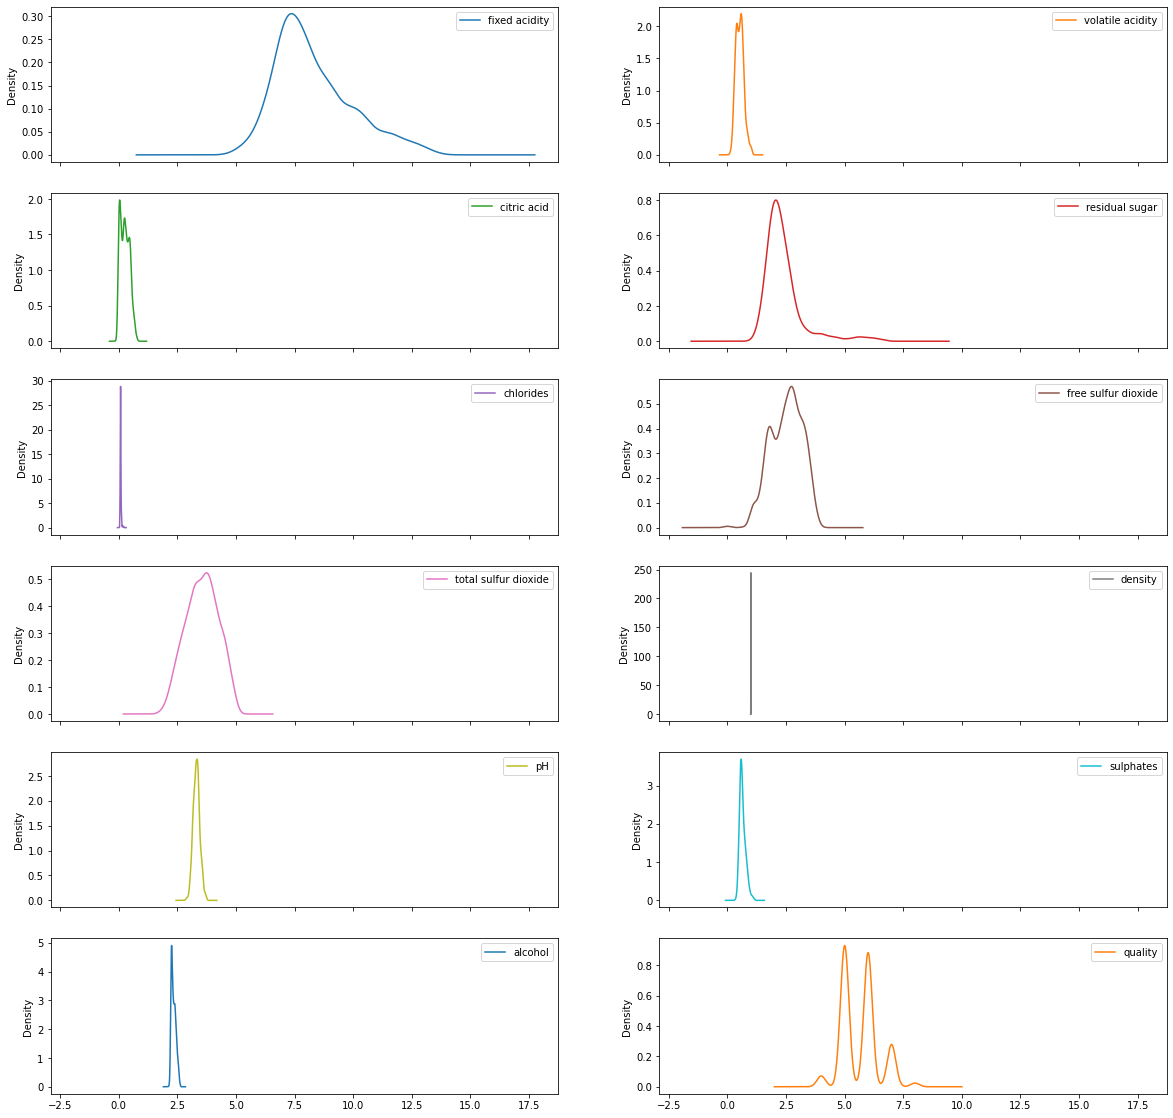

In [34]:
wine.iloc[:,:-1].plot(kind="density", subplots=True, figsize=(20, 20), layout=(6,2))

In [35]:
#skewness removed

In [36]:
x = wine.iloc[:,:-2]

In [37]:
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
16              8.5             0.280         0.56            1.80      0.092   
18              7.4             0.590         0.08            4.40      0.086   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
30              6.7             0.675         0.07            2.40      0.089   
31              6.9             0.685         0.00            2.50      0.105   
32              8.3             0.655         0.12            2.30      0.083   
34              5.2             0.320         0.25            1.80      0.103   
35              7.8             0.645         0.00            5.50      0.086   
36              7.8             0.600         0.14            2.40      0.086   
37              8.1             0.380         0.28            2.10      0.066   
39              7.3             0.450         0.36            5.90      0.074   
40              7.3             0.450         0.36            5.90      0.074   
41              8.8             0.610         0.30            2.80      0.088   
44              6.8             0.670         0.02            1.80      0.050   
46              7.7             0.935         0.43            2.20      0.114   
47              8.7             0.290         0.52            1.60      0.113   
48              6.4             0.400         0.23            1.60      0.066   
49              5.6             0.310         0.37            1.40      0.074   
50              8.8             0.660         0.26            1.70      0.074   
51              6.6             0.520         0.04            2.20      0.069   
52              6.6             0.500         0.04            2.10      0.068   
53              8.6             0.380         0.36            3.00      0.081   
54              7.6             0.510         0.15            2.80      0.110   
55              7.7             0.620         0.04            3.80      0.084   
56             10.2             0.420         0.57            3.40      0.070   
58              7.8             0.590         0.18            2.30      0.076   
59              7.3             0.390

In [38]:
y = wine.iloc[:,-2]

In [39]:
y

0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
16      7
18      4
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
30      5
31      6
32      5
34      5
35      6
36      6
37      7
39      5
40      5
41      4
44      5
46      5
47      5
48      5
49      5
50      5
51      6
52      6
53      5
54      6
55      5
56      5
58      5
59      6
60      5
61      5
62      7
63      5
64      5
65      5
66      5
67      5
68      5
69      6
70      6
71      5
72      5
73      4
74      5
75      5
76      5
77      6
78      5
79      4
80      5
82      5
84      6
85      5
87      5
89      5
90      5
93      5
94      4
96      5
97      5
98      5
99      6
100     6
101     6
102     6
103     5
104     5
105     5
107     5
108     6
110     5
111     5
112     5
113     6
114     5
115     6
116     6
117     6
118     6
119     6


In [40]:
#finding best random state
max_acc = 0
max_rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)
    dtr = DecisionTreeClassifier()
    dtr.fit(x_train, y_train)
    pred = dtr.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_acc:
        max_acc = acc
        max_rs = i
print("Best random state=",max_rs)

Best random state= 33


In [41]:
 x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = 33)

In [42]:
#Decision tree
dtr = DecisionTreeClassifier()
dtr.fit(x_train, y_train)
predict = dtr.predict(x_test)
print("accuracy score=", accuracy_score(y_test, predict))
print("conf. matrix =", confusion_matrix(y_test, predict))
print("classi. report =", classification_report(y_test, predict))

accuracy score= 0.69375
conf. matrix = [[  0   4   3   1   0]
 [  3 104  32   0   0]
 [  1  21  88  10   3]
 [  0   7  12  30   1]
 [  0   0   0   0   0]]
classi. report =               precision    recall  f1-score   support

           4       0.00      0.00      0.00         8
           5       0.76      0.75      0.76       139
           6       0.65      0.72      0.68       123
           7       0.73      0.60      0.66        50
           8       0.00      0.00      0.00         0

    accuracy                           0.69       320
   macro avg       0.43      0.41      0.42       320
weighted avg       0.70      0.69      0.69       320



In [43]:
#Support Vector Machine
svc = SVC()
svc.fit(x_train, y_train)
predict = svc.predict(x_test)
print("accuracy score=", accuracy_score(y_test, predict))
print("conf. matrix =", confusion_matrix(y_test, predict))
print("classi. report =", classification_report(y_test, predict))

accuracy score= 0.53125
conf. matrix = [[ 0  4  4  0]
 [ 0 76 63  0]
 [ 0 29 94  0]
 [ 0  6 44  0]]
classi. report =               precision    recall  f1-score   support

           4       0.00      0.00      0.00         8
           5       0.66      0.55      0.60       139
           6       0.46      0.76      0.57       123
           7       0.00      0.00      0.00        50

    accuracy                           0.53       320
   macro avg       0.28      0.33      0.29       320
weighted avg       0.46      0.53      0.48       320



In [44]:
#KNN
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predict = knn.predict(x_test)
print("accuracy score=", accuracy_score(y_test, predict))
print("conf. matrix =", confusion_matrix(y_test, predict))
print("classi. report =", classification_report(y_test, predict))

accuracy score= 0.5125
conf. matrix = [[ 1  3  4  0]
 [ 2 79 53  5]
 [ 2 49 67  5]
 [ 0  9 24 17]]
classi. report =               precision    recall  f1-score   support

           4       0.20      0.12      0.15         8
           5       0.56      0.57      0.57       139
           6       0.45      0.54      0.49       123
           7       0.63      0.34      0.44        50

    accuracy                           0.51       320
   macro avg       0.46      0.39      0.41       320
weighted avg       0.52      0.51      0.51       320



In [45]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predict = rf.predict(x_test)
print("accuracy score=", accuracy_score(y_test, predict))
print("conf. matrix =", confusion_matrix(y_test, predict))
print("classi. report =", classification_report(y_test, predict))

accuracy score= 0.684375
conf. matrix = [[  0   4   4   0   0]
 [  1 103  35   0   0]
 [  0  29  88   6   0]
 [  0   2  19  28   1]
 [  0   0   0   0   0]]
classi. report =               precision    recall  f1-score   support

           4       0.00      0.00      0.00         8
           5       0.75      0.74      0.74       139
           6       0.60      0.72      0.65       123
           7       0.82      0.56      0.67        50
           8       0.00      0.00      0.00         0

    accuracy                           0.68       320
   macro avg       0.43      0.40      0.41       320
weighted avg       0.68      0.68      0.68       320



In [46]:
#cross validation
from sklearn.model_selection import cross_val_score

In [47]:
#cross validation score for descision tree
deccv = cross_val_score(dtr, x, y, cv=5)
print("Cross validation score for Descion tree =",deccv.mean())

Cross validation score for Descion tree = 0.478286526839673


In [48]:
#cross validation score for SVM
svccv = cross_val_score(svc, x, y, cv=5)
print("Cross validation score for SVC=",svccv.mean())

Cross validation score for SVC= 0.5147837421495438


In [49]:
#cross validation score for KNN
kncv = cross_val_score(knn, x, y, cv=5)
print("Cross validation score for KNN=",kncv.mean())

Cross validation score for KNN= 0.4734613105818225


In [50]:
#cross validation score for randomforest
rfcv = cross_val_score(rf, x, y, cv=5)
print("Cross validation score for randomforest = ",rfcv.mean())

Cross validation score for randomforest =  0.5692854603626022


<h6>Finding the best algorithm</h6>

<!DOCTYPE html>
<html>
<head>
<style>
table, th, td {
  border: 1px solid black;
}
</style>
</head>
<body>


<table style="width:100%">
  <tr>
    <th>Algorithm</th>
    <th>Accuracy</th> 
    <th>CV Accuracy</th>
     <th>Difference</th>
  </tr>
  <tr >
    <td>Decision tree</td>
    <td>0.694</td>
    <td>0.466</td>
      <td> 0.228</td>
  </tr>
  <tr style="color:green;">
    <td>SVC</td>
    <td>0.531</td>
    <td>0.515</td>
      <td>0.016</td>
  </tr>
    <tr>
    <td>KNN</td>
    <td>0.512</td>
    <td>0.473</td>
      <td>0.039</td>
  </tr>
    <tr>
    <td>Random Forest</td>
    <td>0.712</td>
    <td>0.572</td>
      <td>0.14</td>
  </tr>
</table>

</body>
</html>

In [51]:
#SVC is the best Algorithm

<h4>Hyper parameter tuning</h4>

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
parameters = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [54]:
GCV = GridSearchCV(SVC(), parameters, cv=5)

In [55]:
GCV.estimator.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [56]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [57]:
GCV.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [58]:
GCV_predict = GCV.best_estimator_.predict(x_test)

In [59]:
accuracy_score(y_test, GCV_predict)

0.60625

In [60]:
import joblib

In [61]:
joblib.dump(GCV.best_estimator_, "WineMOdel.obj")

['WineMOdel.obj']